In [2]:
from datetime import datetime

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
#Importing the dataframe using pandas
import pandas as pd
start_time = datetime.now() 
# insert the code here
df=pd.read_csv('/Users/anjaligarg/Data science/New York TAXI/new-york-city-taxi-fare-prediction/train.csv', nrows=2000000)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:03.947767


In [5]:
start_time = datetime.now()
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:08.737737


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   key                object        
 1   fare_amount        float64       
 2   pickup_datetime    datetime64[ns]
 3   pickup_longitude   float64       
 4   pickup_latitude    float64       
 5   dropoff_longitude  float64       
 6   dropoff_latitude   float64       
 7   passenger_count    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 122.1+ MB
None


In [7]:
print(df.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  2.000000e+06      2.000000e+06     2.000000e+06       1.999986e+06   
mean   1.134779e+01     -7.252321e+01     3.992963e+01      -7.252395e+01   
std    9.852883e+00      1.286804e+01     7.983352e+00       1.277497e+01   
min   -6.200000e+01     -3.377681e+03    -3.458665e+03      -3.383297e+03   
25%    6.000000e+00     -7.399208e+01     4.073491e+01      -7.399141e+01   
50%    8.500000e+00     -7.398181e+01     4.075263e+01      -7.398016e+01   
75%    1.250000e+01     -7.396713e+01     4.076710e+01      -7.396369e+01   
max    1.273310e+03      2.856442e+03     2.621628e+03       3.414307e+03   

       dropoff_latitude  passenger_count  
count      1.999986e+06     2.000000e+06  
mean       3.992808e+01     1.684113e+00  
std        1.032382e+01     1.314982e+00  
min       -3.461541e+03     0.000000e+00  
25%        4.073400e+01     1.000000e+00  
50%        4.075312e+01     1.000000e+00  
75%  

In [8]:
print(df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


In [9]:
df = df.dropna(axis =0)

In [10]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
print("Number of rows where fare less than 0 are ",len(df[df['fare_amount']<=0]))
print("Maximum value of fare ",df['fare_amount'].max())
print("Number of rows where less than equal to 0 passenger ",len(df[df['passenger_count']<=0]))
print("Maximum number of passenger in a trip ",df['passenger_count'].max())
print("Starting Day in Data",df['pickup_datetime'].min())
print("End Day in Data ",df['pickup_datetime'].max())

Number of rows where fare less than 0 are  133
Maximum value of fare  1273.31
Number of rows where less than equal to 0 passenger  7109
Maximum number of passenger in a trip  208
Starting Day in Data 2009-01-01 00:00:46
End Day in Data  2015-06-30 23:53:49


In [12]:
df.drop(df[df['fare_amount']<=0].index,inplace=True)

In [13]:
df.drop(df[df['passenger_count']==208].index,inplace=True)
df.drop(df[df['passenger_count']==9].index,inplace=True)

In [14]:
df["passenger_count"].replace({0: np.nan}, inplace=True)

In [15]:
df["passenger_count"].fillna(df["passenger_count"].value_counts().index[0],inplace=True)

## Issue with Geographical Data : 
### 1.Wrong latitude and longitude -> Delete the data  (~120)
### 2. Geographical information 0  -> Checked the matching fare_amount 
###     2.a -> No matching fare_amount -> Delete the rowa (71)
### 3. Same pick up and drop Geographical Data -> ?

## Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.

In [16]:
print(len(df[(df['pickup_latitude']<=-90 ) |  (df['pickup_latitude']>=90)]['pickup_latitude']))
print(len(df[(df['dropoff_latitude']<=-90 ) |  (df['dropoff_latitude']>=90)]['dropoff_latitude']))
print(len(df[(df['pickup_longitude']<=-180 ) |  (df['pickup_longitude']>=180)]['pickup_longitude']))
print(len(df[(df['dropoff_longitude']<=-180 ) |  (df['dropoff_longitude']>=180)]['dropoff_longitude']))

33
34
38
36


In [17]:
df.drop(df[(df['pickup_latitude']<=-90 ) | (df['pickup_latitude']>=90)].index,inplace=True)

In [18]:
df.drop(df[(df['dropoff_latitude']<=-90 ) | (df['dropoff_latitude']>=90)].index,inplace=True)

In [19]:
df.drop(df[(df['pickup_longitude']<=-90 ) | (df['pickup_longitude']>=90)].index,inplace=True)

In [20]:
df.drop(df[(df['dropoff_longitude']<=-90 ) | (df['dropoff_longitude']>=90)].index,inplace=True)

In [21]:
print(len(df[(df['pickup_latitude']<=-90 ) |  (df['pickup_latitude']>=90)]['pickup_latitude']))
print(len(df[(df['dropoff_latitude']<=-90 ) |  (df['dropoff_latitude']>=90)]['dropoff_latitude']))
print(len(df[(df['pickup_longitude']<=-180 ) |  (df['pickup_longitude']>=180)]['pickup_longitude']))
print(len(df[(df['dropoff_longitude']<=-180 ) |  (df['dropoff_longitude']>=180)]['dropoff_longitude']))

0
0
0
0


In [22]:
print("Legth after dropping ",len(df))

Legth after dropping  1999756


In [23]:
df.drop(df[((df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)) & (df.fare_amount ==0)].index, inplace=True,axis=0)

In [24]:
len(df[((df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)) & (df.fare_amount ==0)])

0

In [25]:
print("Legth after dropping ",len(df))

Legth after dropping  1999756


In [26]:
print(len(df[df['fare_amount']==0]))

0


## Pending -> Deal with data having same pick up and drop Location 

In [27]:
dfL = df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)]

In [28]:
print("Length of New Dataframe ",len(dfL))
listOfAmount = dfL.fare_amount.unique()
print("Length of List",len(listOfAmount))

Length of New Dataframe  39411
Length of List 747


## Deleting Rows from Df where geographical info is 0 after sending them to new datafra,e

In [29]:
df.drop(df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)].index, inplace=True,axis=0)

In [30]:
len(df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)])

0

## Logic to populate new dfL with geograpical info by matching fare_amount with df

In [31]:
start_time = datetime.now()
listOfPriceNotPresent = []
for price in listOfAmount: 
    #print('Price is ',price)
    g = df[df.fare_amount == price][['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
    #print("Length of g ",len(g))
    if len(g)>0:
        g['count']=0
        h=[]
        h = g.groupby(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']).count()
        h=h.add_suffix('_count').reset_index()
        #print(h)
        listOf = h.sort_values('count_count', ascending=False).iloc[0]
        dfL.loc[dfL['fare_amount']==price,'pickup_latitude'] = listOf.pickup_latitude
        dfL.loc[dfL['fare_amount']==price,'dropoff_longitude'] = listOf.dropoff_longitude
        dfL.loc[dfL['fare_amount']==price,'dropoff_latitude'] = listOf.dropoff_latitude
        dfL.loc[dfL['fare_amount']==price,'pickup_longitude'] = listOf.pickup_longitude
    else:
        listOfPriceNotPresent.append(price)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
    #print("list Of",listOf)
    

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Time elapsed (hh:mm:ss.ms) 0:00:19.401845


In [32]:
print(len(listOfPriceNotPresent))


65


In [33]:
len(dfL[(dfL['pickup_latitude']==0 ) |  (dfL['dropoff_longitude']==0) | (dfL['dropoff_latitude']==0) | (dfL['pickup_longitude']==0)])

70

## There are 71 rows for which no matching fare amount found

In [34]:
dfL.drop(dfL[(dfL['pickup_latitude']==0) | (dfL['dropoff_longitude']==0) | (dfL['dropoff_latitude']==0) | (dfL['pickup_longitude']==0)].index, inplace=True,axis=0)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Appending the dataframe

In [35]:
print(len(dfL))
print(len(df))
df=df.append(dfL, ignore_index = True) 
print(len(df))
dfL=[]

39341
1960345
1999686


In [36]:
print("Number of rows where fare less than 0 are ",len(df[df['fare_amount']<=0]))
print("Maximum value of fare ",df['fare_amount'].max())
print("Number of rows where less than equal to 0 passenger ",len(df[df['passenger_count']<=0]))
print("Maximum number of passenger in a trip ",df['passenger_count'].max())
print("Starting Day in Data",df['pickup_datetime'].min())
print("End Day in Data ",df['pickup_datetime'].max())

Number of rows where fare less than 0 are  0
Maximum value of fare  500.0
Number of rows where less than equal to 0 passenger  0
Maximum number of passenger in a trip  6.0
Starting Day in Data 2009-01-01 00:00:46
End Day in Data  2015-06-30 23:53:49


In [37]:
"""
from datetime import datetime;
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-apply']=df.apply(lambda row:haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
"""

"\nfrom datetime import datetime;\nfrom math import radians, cos, sin, asin, sqrt\ndef haversine(lon1, lat1, lon2, lat2):\n   \n    # convert decimal degrees to radians \n    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])\n    # haversine formula \n    dlon = lon2 - lon1 \n    dlat = lat2 - lat1 \n    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2\n    c = 2 * np.arcsin(np.sqrt(a)) \n    km = 6371* c\n    return km\nstart_time = datetime.now()\ndf['distance-apply']=df.apply(lambda row:haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)\ntime_elapsed = datetime.now() - start_time \nprint('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))\n"

In [38]:
"""
import numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    #MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-pandas-vector'] = haversine( df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
"""

"\nimport numpy as np\n\n# Define a basic Haversine distance formula\ndef haversine(lat1, lon1, lat2, lon2):\n    #MILES = 3959\n    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])\n    dlat = lat2 - lat1 \n    dlon = lon2 - lon1 \n    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2\n    c = 2 * np.arcsin(np.sqrt(a)) \n    km = 6371* c\n    return km\nstart_time = datetime.now()\ndf['distance-pandas-vector'] = haversine( df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])\ntime_elapsed = datetime.now() - start_time \nprint('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))\n"

In [39]:
import numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    #MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-numpy_vector'] = haversine( df['pickup_latitude'].values, df['pickup_longitude'].values,df['dropoff_latitude'].values,df['dropoff_longitude'].values)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:00.253400


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999686 entries, 0 to 1999685
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   key                    object        
 1   fare_amount            float64       
 2   pickup_datetime        datetime64[ns]
 3   pickup_longitude       float64       
 4   pickup_latitude        float64       
 5   dropoff_longitude      float64       
 6   dropoff_latitude       float64       
 7   passenger_count        float64       
 8   distance-numpy_vector  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 137.3+ MB
None


In [41]:
df.loc[(df['pickup_datetime'].dt.hour>4) & (df['pickup_datetime'].dt.hour<=8),'session'] = 'EarlyMorning'
df.loc[(df['pickup_datetime'].dt.hour>8) & (df['pickup_datetime'].dt.hour<=12),'session'] = 'Morning'
df.loc[(df['pickup_datetime'].dt.hour>12) & (df['pickup_datetime'].dt.hour<=16),'session'] = 'Noon'
df.loc[(df['pickup_datetime'].dt.hour>16) & (df['pickup_datetime'].dt.hour<=20),'session'] = 'Evening'
df.loc[(df['pickup_datetime'].dt.hour>20) & (df['pickup_datetime'].dt.hour<=24),'session'] = 'Night'
df.loc[(df['pickup_datetime'].dt.hour<=4),'session'] ='Late-Night'
print(df['session'].unique())

['Evening' 'Noon' 'Late-Night' 'EarlyMorning' 'Morning' 'Night']


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999686 entries, 0 to 1999685
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   key                    object        
 1   fare_amount            float64       
 2   pickup_datetime        datetime64[ns]
 3   pickup_longitude       float64       
 4   pickup_latitude        float64       
 5   dropoff_longitude      float64       
 6   dropoff_latitude       float64       
 7   passenger_count        float64       
 8   distance-numpy_vector  float64       
 9   session                object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 152.6+ MB
None


# Deleting outliers for Fare Amount and Distance

In [43]:
Q1 = df[["fare_amount"]].quantile(0.25)
Q3 = df[["fare_amount"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['fare_amount'] > value[0]]))
df.drop(df[df['fare_amount'] > 22.25].index,axis=0,inplace=True)
Q1 = df[["fare_amount"]].quantile(0.25)
Q3 = df[["fare_amount"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['fare_amount'] > value[0]]))
df.drop(df[df['fare_amount'] > 22.25].index,axis=0,inplace=True)

fare_amount    12.5
Name: 0.75, dtype: float64
value  22.25
172302
fare_amount    11.0
Name: 0.75, dtype: float64
value  18.95
57455


In [44]:
Q1 = df[["distance-numpy_vector"]].quantile(0.25)
Q3 = df[["distance-numpy_vector"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['distance-numpy_vector'] > value[0]]))
df.drop(df[df['distance-numpy_vector'] > value[0]].index,axis=0,inplace=True)

distance-numpy_vector    3.278536
Name: 0.75, dtype: float64
value  6.456297015695855
80702


# Adding year and month column 

In [45]:
df['Year'] =''
df['Month'] =''
df['Year'] = (df['pickup_datetime'].dt.year)
print(df['Year'])
df['Month'] = (df['pickup_datetime'].dt.month)

0          2009
2          2011
3          2012
4          2010
5          2011
           ... 
1999680    2011
1999682    2012
1999683    2012
1999684    2010
1999685    2015
Name: Year, Length: 1746682, dtype: int64


# Adding Holiday 

In [46]:
import holidays
us_holidays=[]
for date in  holidays.CountryHoliday('US', prov=None, state='New York',years=[2009,2010,2011,2012,2013,2014,2015]).items():
    print(date[0])
    us_holidays.append(str(date[0]))
#print(us_holidays,end=', ')

2009-01-01
2009-01-19
2009-02-16
2009-05-25
2009-07-04
2009-07-03
2009-09-07
2009-10-12
2009-11-11
2009-11-26
2009-12-25
2010-01-01
2010-12-31
2010-01-18
2010-02-15
2010-05-31
2010-07-04
2010-07-05
2010-09-06
2010-10-11
2010-11-11
2010-11-25
2010-12-25
2010-12-24
2011-01-01
2011-01-17
2011-02-21
2011-05-30
2011-07-04
2011-09-05
2011-10-10
2011-11-11
2011-11-24
2011-12-25
2011-12-26
2012-01-01
2012-01-02
2012-01-16
2012-02-20
2012-05-28
2012-07-04
2012-09-03
2012-10-08
2012-11-11
2012-11-12
2012-11-22
2012-12-25
2013-01-01
2013-01-21
2013-02-18
2013-05-27
2013-07-04
2013-09-02
2013-10-14
2013-11-11
2013-11-28
2013-12-25
2014-01-01
2014-01-20
2014-02-17
2014-05-26
2014-07-04
2014-09-01
2014-10-13
2014-11-11
2014-11-27
2014-12-25
2015-01-01
2015-01-19
2015-02-16
2015-05-25
2015-07-04
2015-07-03
2015-09-07
2015-10-12
2015-11-11
2015-11-26
2015-12-25


In [47]:
df['n_holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in df['pickup_datetime']]
df['Holiday'] = df['pickup_datetime'].dt.weekday
df['Holiday'] = [1 if val>=5 else 0 for val in df['Holiday']]
df['Holiday'] = df['Holiday']+df['n_holiday']
df['Holiday'] = [1 if val>=1 else 0 for val in df['Holiday']]
df.drop(columns='n_holiday',axis=1,inplace=True)

In [48]:
print(df.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector', 'session', 'Year', 'Month',
       'Holiday'],
      dtype='object')


# EDA

## Fare

In [49]:
df['fare_amount'].hist(bins=75, rwidth=.8, figsize=(14,4))
#plt.title('Fares')
plt.show()

NameError: name 'plt' is not defined

In [488]:
print(df['fare_amount'].value_counts(bins=75,ascending=True))

(0.307, 0.603]        0
(0.603, 0.9]          0
(0.9, 1.196]          0
(1.196, 1.493]        0
(1.493, 1.789]        0
                  ...  
(7.423, 7.72]     85531
(4.755, 5.051]    93280
(6.83, 7.127]     94230
(6.237, 6.534]    97567
(5.941, 6.237]    99098
Name: fare_amount, Length: 75, dtype: int64


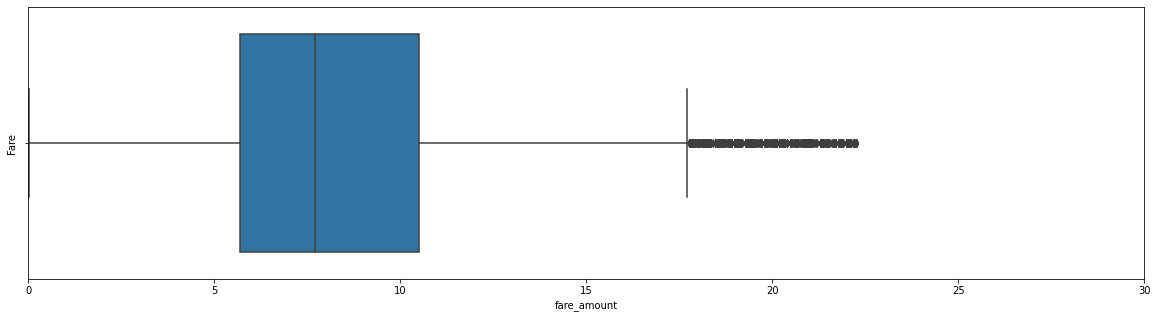

In [490]:
plt.figure(figsize=(20,5))
plt.xlim(0,30)
plt.ylabel('Fare')
sns.boxplot(x=df['fare_amount'])
plt.show()

In [491]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector', 'session', 'Holiday'],
      dtype='object')

# Fare

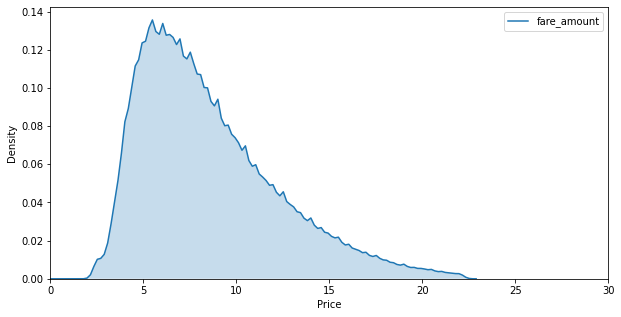

In [718]:
plt.figure(figsize=(10,5))
plt.xlim(0,30)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(df['fare_amount'],shade=True)
plt.show()

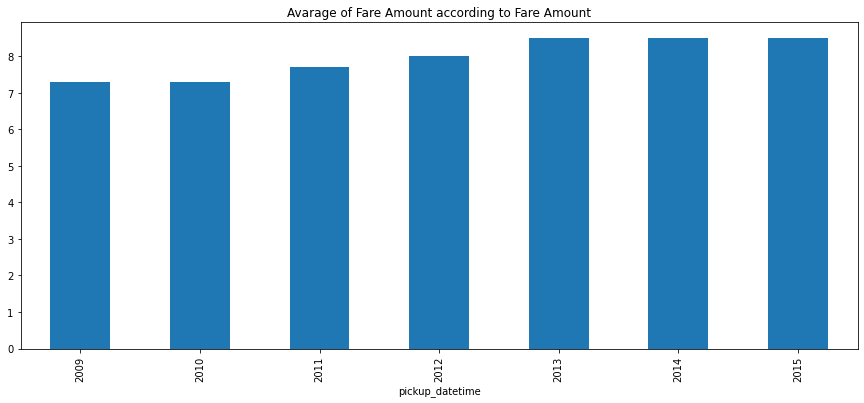

In [457]:
df.groupby(df.pickup_datetime.dt.year).fare_amount.median().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

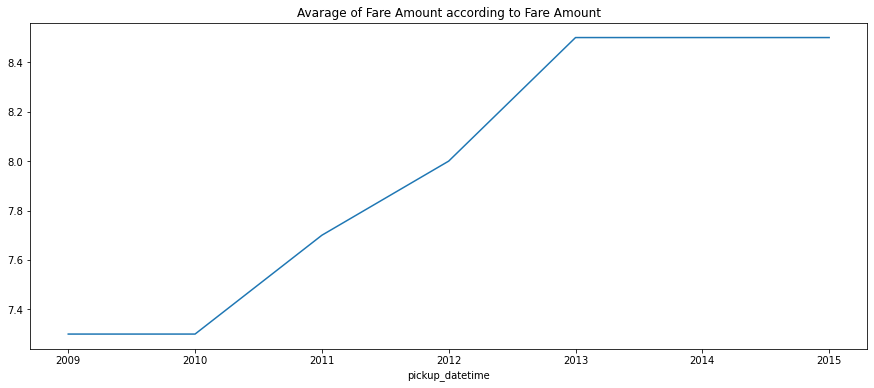

In [458]:
df.groupby(df.pickup_datetime.dt.year).fare_amount.median().plot(kind='line', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

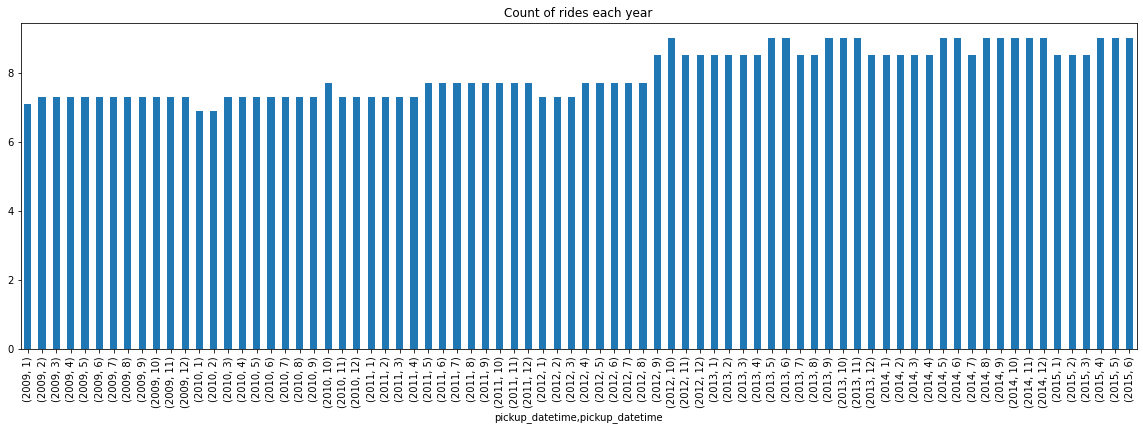

In [459]:
df.groupby([df.pickup_datetime.dt.year,df.pickup_datetime.dt.month]).fare_amount.median().plot(kind='bar', figsize=(20,6))
plt.title('Count of rides each year')
plt.show()

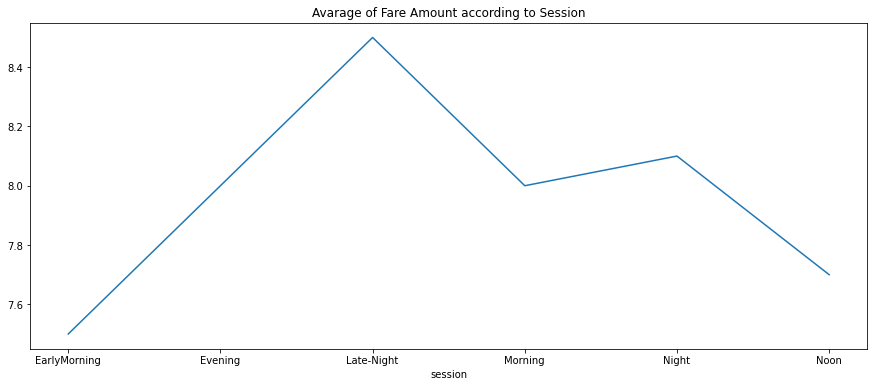

In [460]:
df.groupby(df.session).fare_amount.median().plot(kind='line', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

## Passenger 

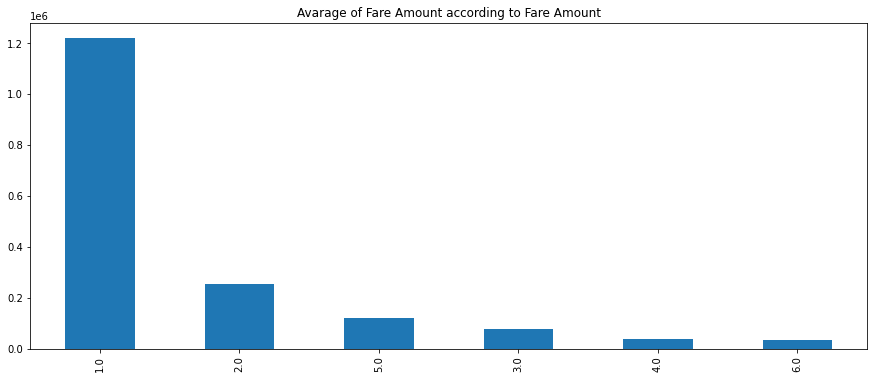

In [465]:
df.passenger_count.value_counts().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

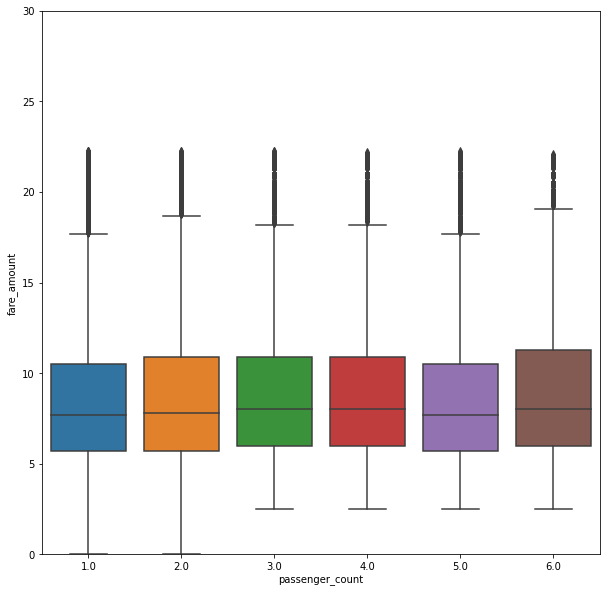

In [468]:
plt.figure(figsize=(10,10))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='fare_amount',data = df)
plt.show()

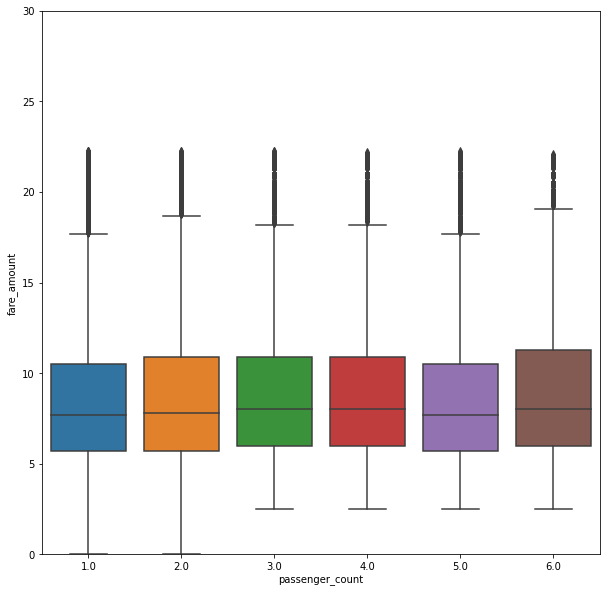

In [467]:
plt.figure(figsize=(10,10))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='fare_amount',data = df)
plt.show()

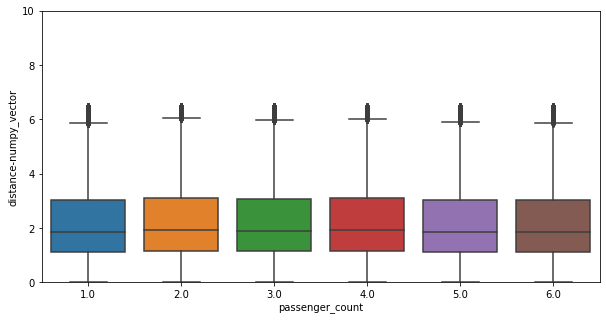

In [472]:
plt.figure(figsize=(10,5))
plt.ylim(0,10)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='distance-numpy_vector',data = df)
plt.show()

# Session

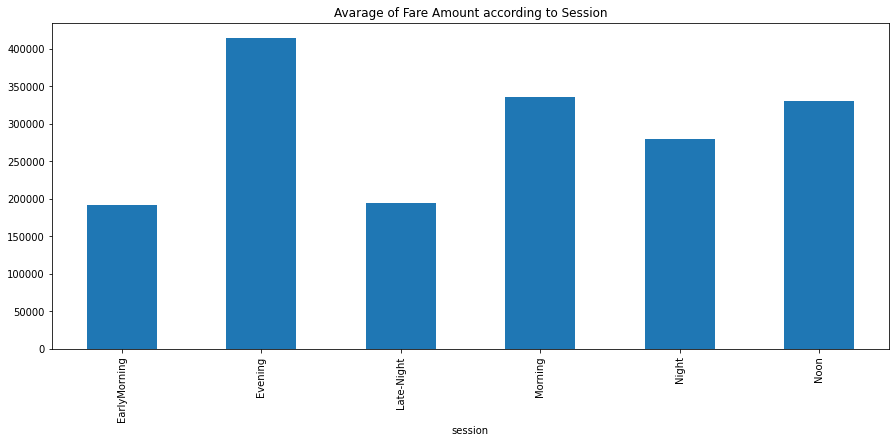

In [473]:
df.groupby(df.session).fare_amount.count().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

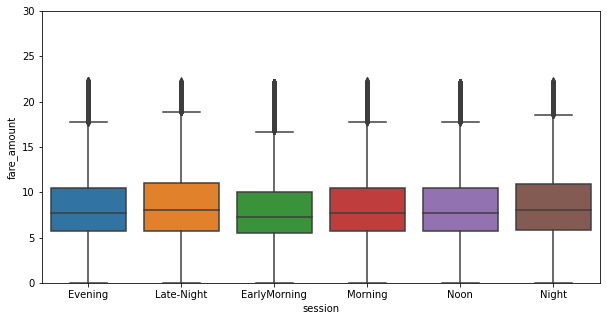

In [474]:
plt.figure(figsize=(10,5))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='fare_amount',data = df)
plt.show()

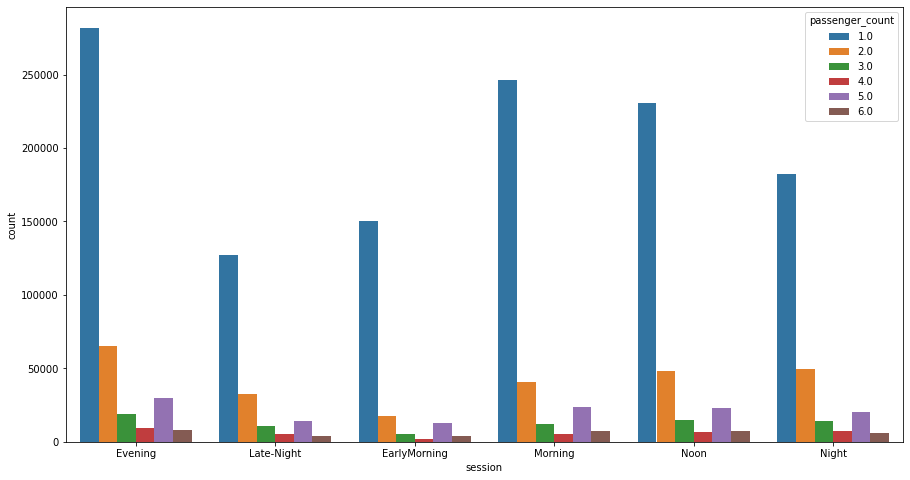

In [475]:
plt.figure(figsize=(15,8))
sns.countplot(x='session', hue='passenger_count', data=df)
plt.show()


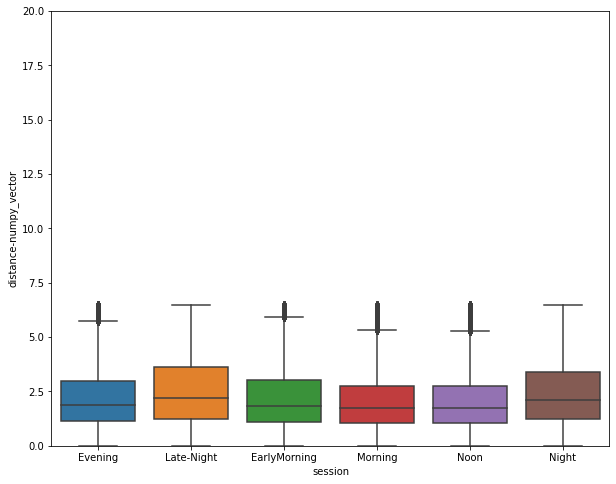

In [476]:
plt.figure(figsize=(10,8))
plt.ylim(0,20)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='distance-numpy_vector',data = df)
plt.show()

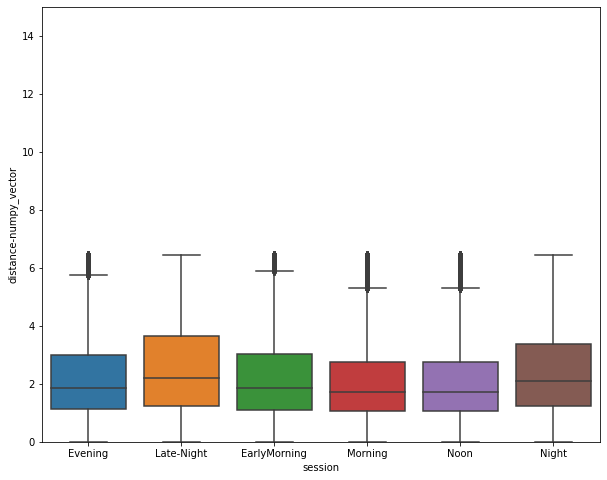

In [477]:
plt.figure(figsize=(10,8))
plt.ylim(0,15)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='distance-numpy_vector',data = df)
plt.show()

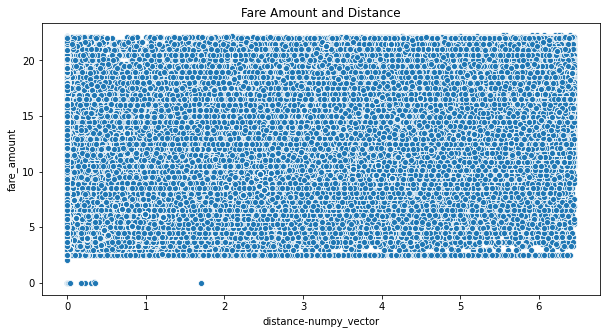

In [504]:
plt.figure(figsize=(10,5))
#plt.ylim(0,15)
#plt.ylim(0,700)
plt.title('Fare Amount and Distance')
data = df
sns.scatterplot(data['distance-numpy_vector'],data['fare_amount'])
plt.show()

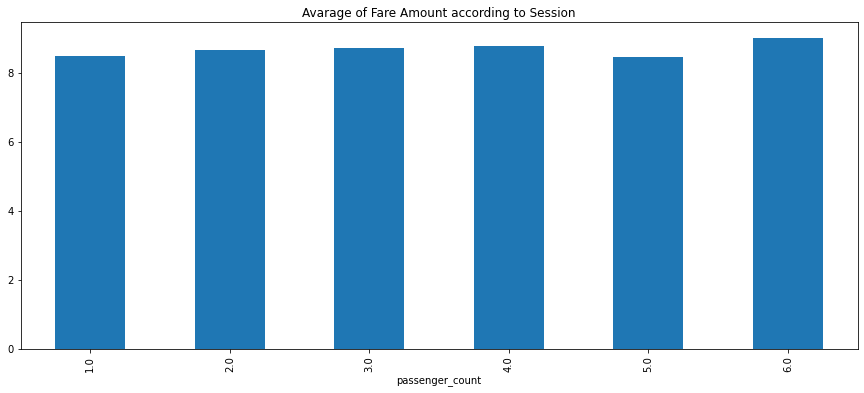

In [483]:
df.groupby(df.passenger_count).fare_amount.mean().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()




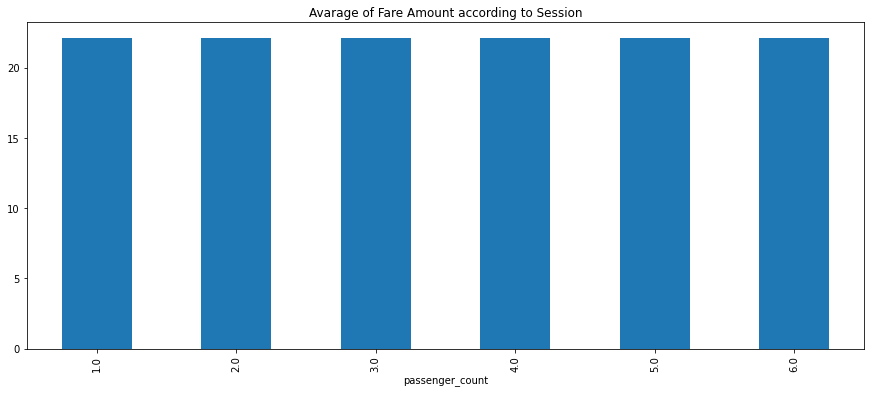

In [484]:
df[df['fare_amount']>22].groupby(df.passenger_count).fare_amount.mean().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

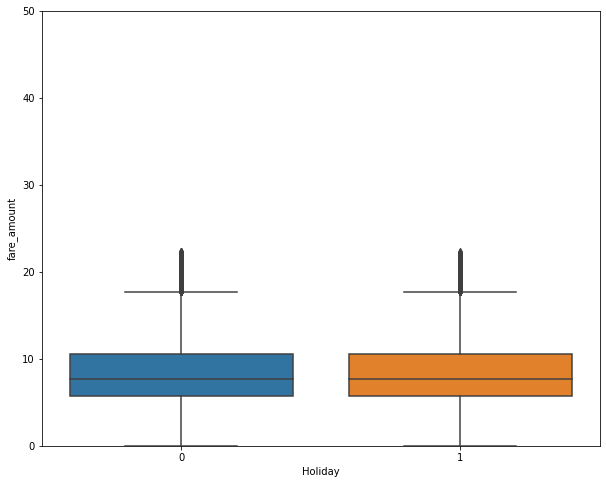

In [485]:
plt.figure(figsize=(10,8))

plt.ylim(0,50)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='Holiday' , y ='fare_amount',data = df)
plt.show()

# Modelling

In [49]:
X=[]
X = df[['fare_amount','distance-numpy_vector','session','Holiday','passenger_count','Year','Month']]

In [50]:
feature_cols = ['distance-numpy_vector', 'session', 'passenger_count',
       'Year', 'Month', 'Holiday_0', 'Holiday_1']
y = X['fare_amount']
X.drop('fare_amount', axis=1, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
print(feature_cols)

['distance-numpy_vector', 'session', 'passenger_count', 'Year', 'Month', 'Holiday_0', 'Holiday_1']


## Train test split

In [52]:
# Split data intro train and validation sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (1222677, 6)
X_test: (524005, 6)
y_train: (1222677,)
y_test: (524005,)


In [53]:
X_train.session.replace({'Evening':4, 'Late-Night':6, 'EarlyMorning':1, 'Morning':2, 'Night':5,'Noon':3}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
X_test.session.replace({'Evening':4, 'Late-Night':6, 'EarlyMorning':1, 'Morning':2, 'Night':5,'Noon':3}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
print(X.Year.unique())

[2009 2011 2012 2010 2013 2014 2015]


In [56]:
X_train.Year.replace({2009:1,2010:2, 2011:3, 2012:4, 2013:5,2014:6,2015:7}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
X_test.Year.replace({2009:1,2010:2, 2011:3, 2012:4, 2013:5,2014:6,2015:7}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
print(X_train.Year.unique())

[2 5 1 7 4 6 3]


In [59]:
X_train['passenger_count'] = X_train['passenger_count'].astype(float)
X_train['passenger_count'] = X_train['passenger_count'].astype(int)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
X_test['passenger_count'] = X_test['passenger_count'].astype(float)
X_test['passenger_count'] = X_test['passenger_count'].astype(int)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(X_train[['Holiday']]).toarray())
# merge with main df X_train on key values
X_train = X_train.join(enc_df)
X_train
"""

In [61]:
X_train = pd.get_dummies(X_train,prefix=['Holiday'],columns=['Holiday'])


In [62]:
X_test = pd.get_dummies(X_test,prefix=['Holiday'],columns=['Holiday'])

In [63]:
print(X_train.Holiday_1.unique())

[1 0]


In [64]:
X_train.columns

Index(['distance-numpy_vector', 'session', 'passenger_count', 'Year', 'Month',
       'Holiday_0', 'Holiday_1'],
      dtype='object')

In [65]:
print(X_train)

         distance-numpy_vector  session  passenger_count  Year  Month  \
945806                1.590662        4                1     2      4   
1859768               2.047176        4                2     5      2   
1061354               1.961546        4                1     1      6   
1381686               1.812159        5                2     7      5   
122022                2.814551        5                1     7      3   
...                        ...      ...              ...   ...    ...   
296824                3.901961        2                1     5      9   
1619577               2.322949        2                1     3      7   
151109                1.627125        4                1     4      9   
768689                4.499561        3                1     4      9   
139683                2.593292        5                1     2      9   

         Holiday_0  Holiday_1  
945806           0          1  
1859768          1          0  
1061354          1         

# Min Max Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
from sklearn.model_selection import train_test_split
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X_train)
# transform the test test
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()
lr.fit(X_scaled, y_train)
y_pred_test = lr.predict(X_test) 
y_pred_train =lr.predict(X_scaled) 

In [70]:
print('Intercept:',lr.intercept_)                                            
print('Coefficients:',lr.coef_)

Intercept: 2588884434008.9434
Coefficients: [ 1.26256827e+01 -4.02255696e-01  1.87928323e-01  2.11420290e+00
  5.63161611e-01 -2.58888443e+12 -2.58888443e+12]


In [71]:
feature_cols.insert(0,'Intercept')
coef = lr.coef_.tolist()
coef.insert(0, lr.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 2588884434008.9434
distance-numpy_vector 12.625682681231478
session -0.40225569565171215
passenger_count 0.18792832321742406
Year 2.114202901505858
Month 0.5631616105434879
Holiday_0 -2588884434005.7085
Holiday_1 -2588884434005.9873


In [72]:
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 2.3191382080497513
RMSE for test set is 2.309090825041414


In [73]:
print(X)

         distance-numpy_vector       session  Holiday  passenger_count  Year  \
0                     1.030764       Evening        0              1.0  2009   
2                     1.389525    Late-Night        0              2.0  2011   
3                     2.799270    Late-Night        1              1.0  2012   
4                     1.999157  EarlyMorning        0              1.0  2010   
5                     3.787239       Morning        0              1.0  2011   
...                        ...           ...      ...              ...   ...   
1999680               0.000000  EarlyMorning        0              1.0  2011   
1999682               0.000000         Night        0              5.0  2012   
1999683               0.000000       Morning        0              2.0  2012   
1999684               0.000000         Night        1              3.0  2010   
1999685               0.000000       Evening        0              1.0  2015   

         Month  
0            6  
2    

In [74]:
import statsmodels.api as sm
result = sm.OLS(y_train, X_scaled).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 3.212e+05
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:47:06   Log-Likelihood:            -2.7634e+06
No. Observations:             1222677   AIC:                         5.527e+06
Df Residuals:                 1222670   BIC:                         5.527e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.6258      0.009   1350.723      0.0

In [75]:
print('R2: ', result.rsquared)

R2:  0.6118397933269089


In [76]:
from sklearn.svm import SVR

In [ ]:
"""
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled,y_train)
"""

In [77]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [80]:
y_pred_train_dt = regressor.predict(X_scaled) 

In [81]:
y_pred_test_dt = regressor.predict(X_test) 
# print the predicted price 
print("Predicted price: % d\n", y_pred_test) 

Predicted price: % d
 [10.1 10.5  6.  ... 10.1 10.   6.1]


In [82]:
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
    RMSE_test =  np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_dt))
    print('RMSE for training set in Decision Tree is {}'.format(RMSE_train))
    print('RMSE for test set  in Decisioj Tree is {}'.format(RMSE_test))
lr()

RMSE for training set in Decision Tree is 0.5941206445699783
RMSE for test set  in Decisioj Tree is 2.9391083919851293


In [85]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file ='tree.dot')

# Passengers

# Geoplots

In [53]:
!pip install git+git://github.com/geopandas/geopandas.git
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/ResidentMario/geoplot.git to /private/var/folders/n1/7qwp4yy96dqf1sh5zvj9j24w0000gn/T/pip-req-build-mpldc_kk
  Running command git clone -q git://github.com/ResidentMario/geoplot.git /private/var/folders/n1/7qwp4yy96dqf1sh5zvj9j24w0000gn/T/pip-req-build-mpldc_kk
^C
ERROR: Operation cancelled by user


In [98]:
!pip install descartes

  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'geoplot'

In [96]:
street_map = gpd.read_file('ny_boundaries/geo_export_3f0dc64e-ba5e-4aa2-9a8a-4d8aaa118813.shp')

In [79]:
crs = {'init':'epsg:4326'}

In [84]:
from shapely.geometry import Polygon,Point

In [80]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-pandas-vector', 'distance-numpy_vector'],
      dtype='object')

In [85]:
geomatry = [Point(xy) for xy in zip(df['pickup_longitude'],df['pickup_latitude']) ]

In [86]:
print(geomatry[:3])

[<shapely.geometry.point.Point object at 0x7f846ccdb080>, <shapely.geometry.point.Point object at 0x7f846ccdb198>, <shapely.geometry.point.Point object at 0x7f846ccdb630>]


In [88]:
geo_df = gpd.GeoDataFrame(df,crs= crs,geometry=geomatry)
geo_df.head()

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance-pandas-vector,distance-numpy_vector,geometry
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764,POINT (-73.84431 40.72132)
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134,POINT (-74.01605 40.71130)
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525,POINT (-73.98274 40.76127)
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270,POINT (-73.98713 40.73314)
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157,POINT (-73.96809 40.76801)


No handles with labels found to put in legend.


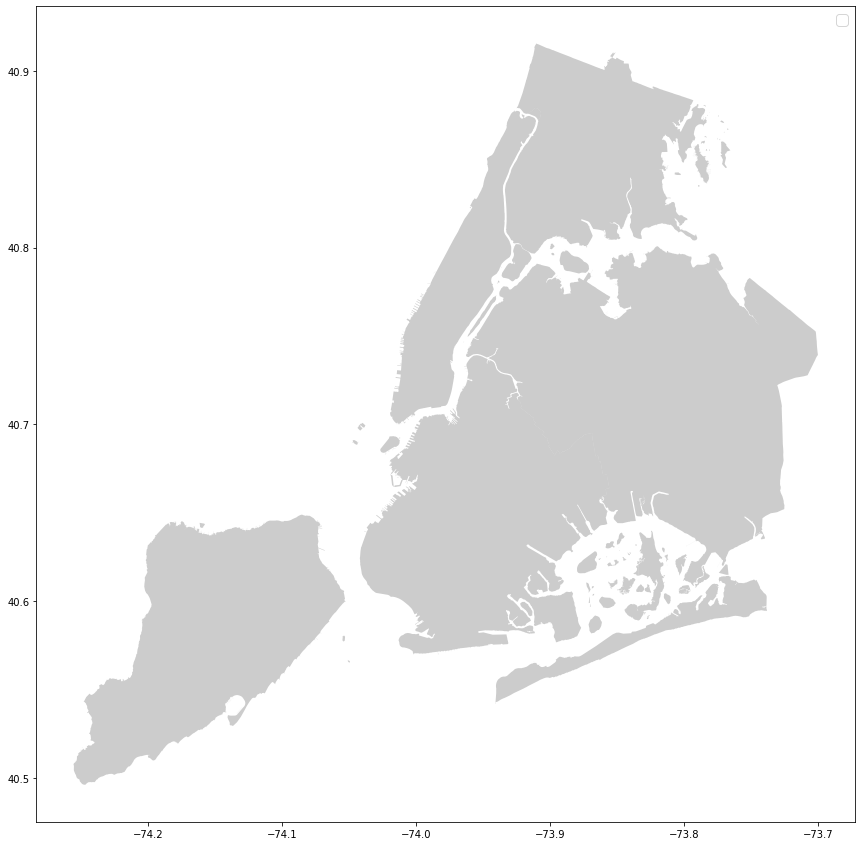

In [101]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
#geo_df.plot(ax=ax)
plt.legend(prop = {'size':15})

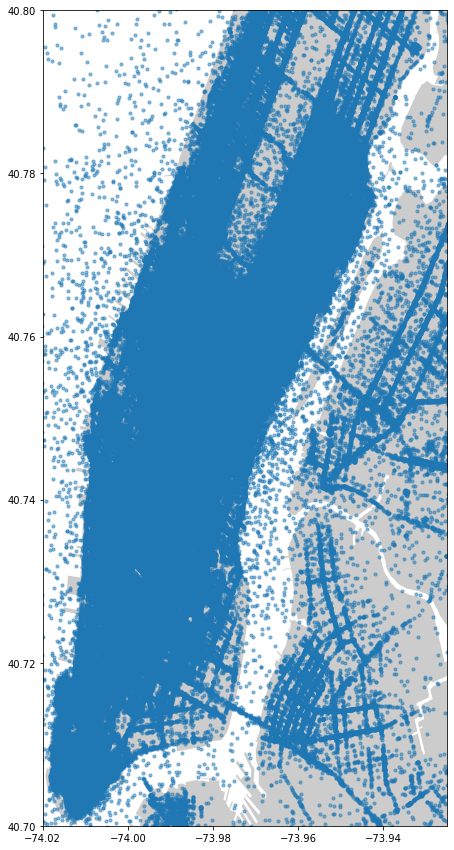

In [105]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,25))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
#plt.title(‘Rental Prices in NYC’, fontsize=15,fontweight=’bold’)
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

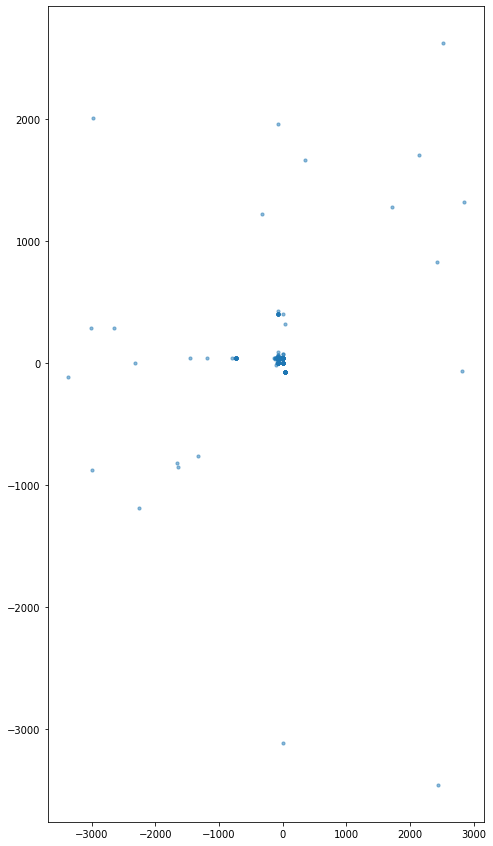

In [106]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
#plt.title(‘Rental Prices in NYC’, fontsize=15,fontweight=’bold’)
# set latitiude and longitude boundaries for map display
#plt.xlim(-74.02,-73.925)
#plt.ylim( 40.7,40.8)
# show map
plt.show()

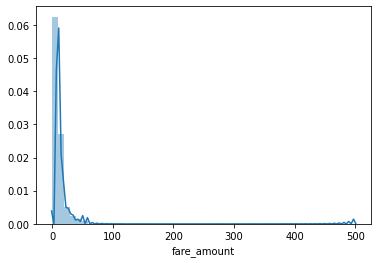

In [112]:
import seaborn as sns
sns.distplot(df['fare_amount'])

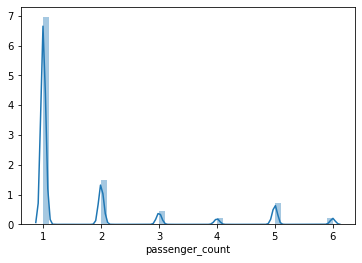

In [113]:
import seaborn as sns
sns.distplot(df['passenger_count'])

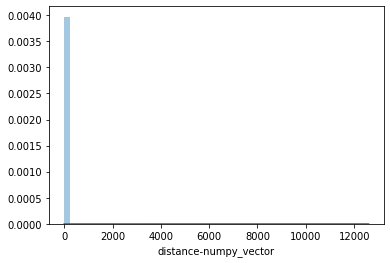

In [114]:
import seaborn as sns
sns.distplot(df['distance-numpy_vector'])

In [126]:
df['distance-numpy_vector'].value_counts(bins=20,ascending=True)

(10705.499, 11335.234]          0
(9446.029, 10075.764]           0
(8816.293, 9446.029]            0
(7556.823, 8186.558]            0
(6927.088, 7556.823]            0
(6297.352, 6927.088]            0
(11335.234, 11964.969]          0
(10075.764, 10705.499]          0
(11964.969, 12594.705]          1
(1889.206, 2518.941]            1
(2518.941, 3148.676]            4
(3148.676, 3778.411]            5
(8186.558, 8816.293]            5
(1259.47, 1889.206]             7
(3778.411, 4408.147]           36
(629.735, 1259.47]             72
(4408.147, 5037.882]           75
(5037.882, 5667.617]          109
(5667.617, 6297.352]          154
(-12.596, 629.735]        1999217
Name: distance-numpy_vector, dtype: int64

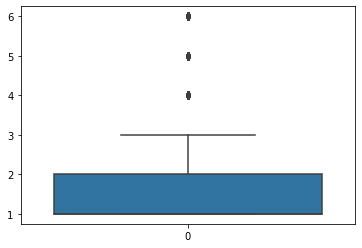

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['passenger_count'])

In [115]:
print(lendf[df['passenger_count']==208])

                                  key fare_amount            pickup_datetime  \
929022  2009-07-30 11:54:00.000000193         3.3  2009-07-30 11:54:00+00:00   

       pickup_longitude pickup_latitude dropoff_longitude dropoff_latitude  \
929022                0               0                 0                0   

       passenger_count distance-numpy_vector  session  
929022             208                     0  Morning  


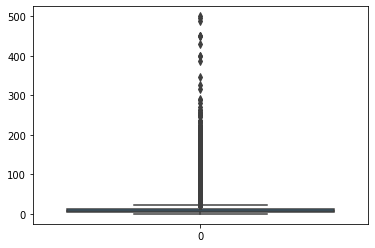

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['fare_amount'])

In [21]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector'],
      dtype='object')

In [22]:
df1=df[['fare_amount','passenger_count','pickup_datetime','distance-numpy_vector']]

In [ ]:
# differentiate minimum an maximum outliers .

In [107]:
Q1 = df[["fare_amount", "passenger_count","distance-numpy_vector"]].quantile(0.25)
Q3 = df[["fare_amount", "passenger_count","distance-numpy_vector"]].quantile(0.75)
IQR = Q3 - Q1
((df[["fare_amount", "passenger_count","distance-numpy_vector"]] < (Q1 - 1.5 * IQR)) | (df[["fare_amount","distance-numpy_vector", "passenger_count"]] > (Q3 + 1.5 * IQR))).sum()

distance-numpy_vector    166466
fare_amount              172302
passenger_count          226114
dtype: int64

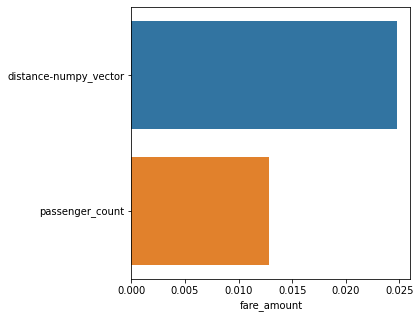

In [25]:

corr = df1.corr()
corr = corr.sort_values('fare_amount', ascending=False)
#print(corr)
plt.figure(figsize=(5,5))
g=sns.barplot( corr.fare_amount[1:], corr.index[1:], orient='h')
#for index, row in corr.iterrows():
  #  g.text(color='black', ha="center")
plt.show()

In [26]:
print(df1.corr())

                       fare_amount  passenger_count  distance-numpy_vector
fare_amount               1.000000         0.012798               0.024782
passenger_count           0.012798         1.000000              -0.000942
distance-numpy_vector     0.024782        -0.000942               1.000000


In [196]:
hours = df['pickup_datetime'].dt.hour
print(hours.unique())

[17 16  0  4  7  9 20 13  1 19 14 12 18 15  6 21 23  3  8 10 11  2 22  5]


In [ ]:
print(df.info())

In [126]:
# Morning , Working-Hours ,  Night and Late Night

['Evening' 'Noon' 'Late-Night' 'EarlyMorning' 'Morning' 'Night']


In [ ]:
print(df.info())

In [199]:
print(df.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector', 'session'],
      dtype='object')


(array([   7104.,       0.,       0.,       0.,       0., 1382976.,
              0.,       0.,       0.,       0.,  295850.,       0.,
              0.,       0.,       0.,   87642.,       0.,       0.,
              0.,       0.,   42643.,       0.,       0.,       0.,
              0.,  141475.,       0.,       0.,       0.,   41996.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

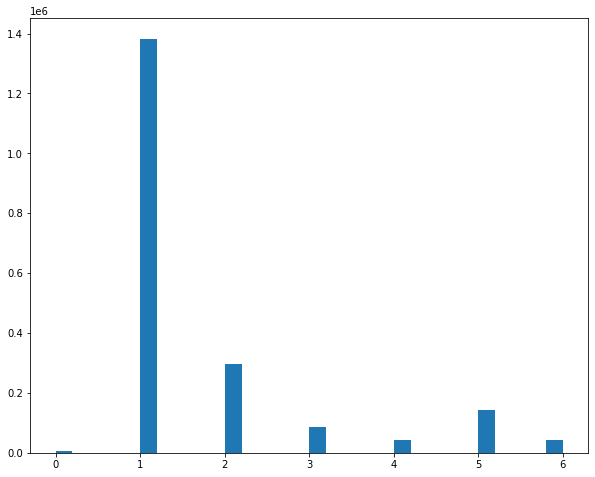

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.hist(df['passenger_count'], bins =30)

In [100]:
df['passenger_count'].value_counts()

1.0    1390080
2.0     295850
5.0     141475
3.0      87642
4.0      42643
6.0      41996
Name: passenger_count, dtype: int64

In [109]:
df['fare_amount'].value_counts()

6.50      97414
4.50      82258
8.50      74876
5.30      58766
5.70      58305
          ...  
129.98        1
79.01         1
30.49         1
81.41         1
113.75        1
Name: fare_amount, Length: 2734, dtype: int64

In [111]:
df['distance-numpy_vector'].value_counts(ascending=True)

1.175483         1
2.078165         1
1.099513         1
1.106285         1
1.404811         1
             ...  
10.173174      187
3.018107       216
0.763322       254
0.251714       387
0.000000     54645
Name: distance-numpy_vector, Length: 1939185, dtype: int64

(array([1.506378e+06, 3.518830e+05, 7.855700e+04, 3.708000e+04,
        2.100400e+04, 2.221000e+03, 1.236000e+03, 5.680000e+02,
        2.270000e+02, 1.510000e+02, 1.040000e+02, 8.500000e+01,
        4.900000e+01, 3.300000e+01, 2.300000e+01, 2.700000e+01,
        1.600000e+01, 1.300000e+01, 6.000000e+00, 3.000000e+00,
        4.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 3.000000e+00]),
 array([1.0000000e-02, 1.2509750e+01, 2.5009500e+01, 3.7509250e+01,
        5.0009000e+01, 6.2508750e+01, 7.5008500e+01, 8.7508250e+01,
        1.0000800e+02, 1.1250775e+02, 1.2500750e+02, 1.3750725e+02,
        1.5000700e+02, 1.6250675e+02, 1.7500650e+02, 1.8750625e+02,
        2.0000600e+02, 2.1250575e+02, 2.2500550e+02, 2.3750525e+02,
        2.5000500e

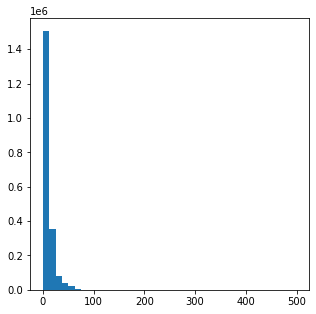

In [106]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=[5,5])
plt.hist(df['fare_amount'], bins =40)

(array([1.999191e+06, 2.600000e+01, 6.400000e+01, 8.000000e+00,
        4.000000e+00, 3.000000e+00, 0.000000e+00, 1.000000e+00,
        2.000000e+00, 2.000000e+00, 2.000000e+00, 3.000000e+00,
        3.200000e+01, 4.000000e+00, 7.400000e+01, 1.000000e+00,
        5.000000e+00, 1.040000e+02, 6.300000e+01, 9.100000e+01,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 4.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]),
 array([    0.        ,   314.86761812,   629.73523624,   944.60285436,
         1259.47047248,  1574.33809061,  1889.20570873,  2204.07332685,
         2518.94094497,  2833.80856309,  3148.67618121,  3463.54379933,
         3778.41141745,  4093.27903557,  4408.14665369,  4723.01427182,
         5037.88188994,  5352.74950806,  5667.61712618,  5982.4847443 

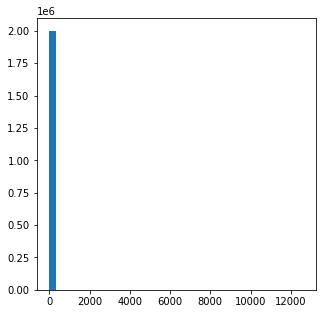

In [108]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=[5,5])
plt.hist(df['distance-numpy_vector'], bins =40)

TypeError: '<=' not supported between instances of 'float' and 'str'

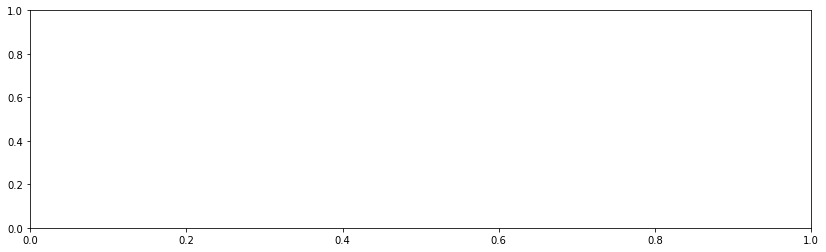